In [204]:
import statistics
from datetime import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("dark_background")

In [142]:
filepath = "../sample csv data/Hotel reservations data.csv"

no_of_adults = 'no_of_adults'
no_of_children = 'no_of_children'
no_of_weekend_nights = 'no_of_weekend_nights'
no_of_week_nights = 'no_of_week_nights'
type_of_meal_plan = 'type_of_meal_plan'
required_car_parking_space = 'required_car_parking_space'
room_type_reserved = 'room_type_reserved'
lead_time = 'lead_time'
arrival_year = 'arrival_year'
arrival_month = 'arrival_month'
arrival_day = 'arrival_day'
arrival_date = 'arrival_date'
market_segment_type = 'market_segment_type'
repeated_guest = 'repeated_guest'
no_of_previous_cancellations = 'no_of_previous_cancellations'
no_of_previous_bookings_not_canceled = 'no_of_previous_bookings_not_canceled'
avg_price_per_room = 'avg_price_per_room'
no_of_special_requests = 'no_of_special_requests'
booking_status = 'booking_status'

df = pd.read_csv(filepath)
df.drop('Booking_ID', axis='columns', inplace=True)
df.rename(columns={arrival_date: arrival_day}, inplace=True)
df.drop(
    [no_of_previous_cancellations, no_of_previous_bookings_not_canceled, required_car_parking_space, repeated_guest],
    axis='columns',
    inplace=True,
)

df[arrival_date] = pd.to_datetime(
    df[arrival_year].astype(str) + "-" +
    df[arrival_month].astype(str) + "-" +
    df[arrival_day].astype(str)
)

In [145]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_day,market_segment_type,avg_price_per_room,no_of_special_requests,booking_status,arrival_date
0,2,0,0,5,Meal Plan 1,Room_Type 4,44,2018,10,1,Online,133.44,3,Not_Canceled,2018-10-01
1,2,0,0,3,Meal Plan 1,Room_Type 1,37,2018,10,1,Offline,105.00,0,Not_Canceled,2018-10-01
2,2,0,0,2,Meal Plan 1,Room_Type 1,72,2018,10,3,Offline,85.50,0,Not_Canceled,2018-10-03
3,2,0,0,3,Meal Plan 1,Room_Type 4,30,2018,10,3,Online,157.50,2,Not_Canceled,2018-10-03
4,2,0,0,5,Meal Plan 1,Room_Type 4,128,2018,10,4,Online,132.30,0,Canceled,2018-10-04


<Axes: xlabel='market_segment_type', ylabel='count'>

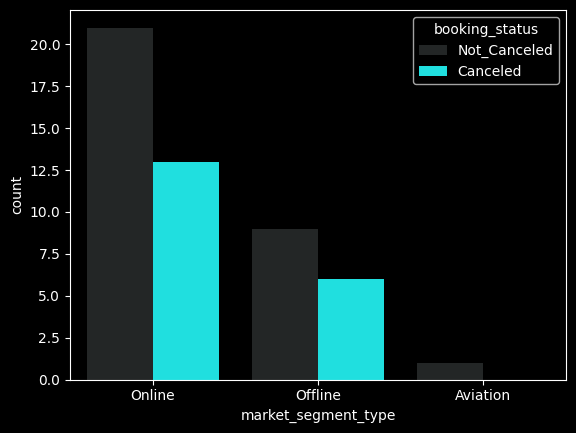

In [51]:
plt.Figure(figsize=(10, 6))
sns.countplot(data=df, x=market_segment_type, hue=booking_status, palette='dark:cyan')

In [64]:
pd.pivot_table(
    df,
    arrival_date,
    index=market_segment_type,
    columns=booking_status,
    aggfunc='count',
    fill_value=0,
)

booking_status,Canceled,Not_Canceled
market_segment_type,,
Aviation,0,1
Offline,6,9
Online,13,21


<Axes: xlabel='room_type_reserved', ylabel='count'>

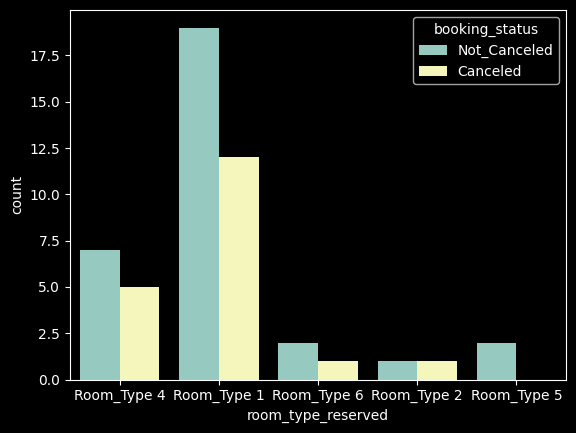

In [69]:
sns.countplot(df, x=room_type_reserved, hue=booking_status)

<Axes: xlabel='room_type_reserved'>

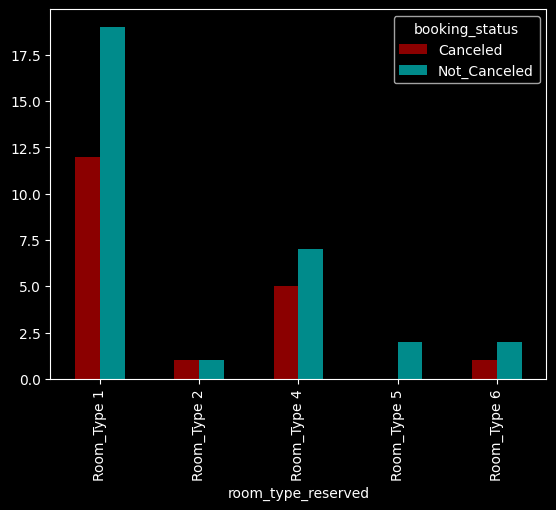

In [88]:
pd.pivot_table(
    df,
    arrival_date,
    index=room_type_reserved,
    columns=booking_status,
    aggfunc="count",
    fill_value=0,
).plot.bar(color=['darkred', 'darkcyan'])

<Axes: xlabel='lead_time', ylabel='avg_price_per_room'>

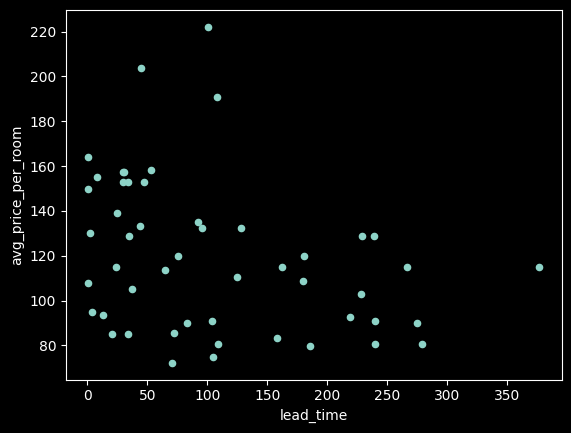

In [147]:
df.plot.scatter(x=lead_time, y=avg_price_per_room)

In [208]:
pd.pivot_table(
    df,
    [no_of_adults, no_of_children],
    index=room_type_reserved,
    columns=booking_status,
    aggfunc=statistics.mode,
    fill_value=0,
)

no_of_adults              no_of_children             
booking_status         Canceled Not_Canceled       Canceled Not_Canceled
room_type_reserved                                                      
Room_Type 1                   2            2              0            0
Room_Type 2                   0            0              2            2
Room_Type 4                   2            2              0            0
Room_Type 5                   0            1              0            0
Room_Type 6                   2            2              2            2